In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px

In [46]:
try:
    data = pd.read_csv('Final Cleaned Crop Production.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

In [47]:
print(f"Dataset shape: {data.shape}")
print("\nColumn names:\n-----------------\n")
print(data.columns)
print("\nFirst few rows of the dataset:\n-----------------------\n")
display(data.head())

Dataset shape: (9765, 47)

Column names:
-----------------

Index(['STCODE', 'DIST', 'YEAR', 'RICE Kharif area', 'RICE Kharif production',
       'RICE Total Area', 'RICE Total Production', 'RICE Total Yield',
       'WHT Rabi area', 'WHT Rabi production', 'WHT Total Area',
       'WHT Total Production', 'WHT Total Yield', 'MAIZ Kharif area',
       'MAIZ Kharif production', 'MAIZ Total Area', 'MAIZ Total Production',
       'MAIZ Total Yield', 'CPEA Rabi area', 'CPEA Rabi production',
       'CPEA Total Area', 'CPEA Total Production', 'CPEA Total Yield',
       'PPEA Kharif area', 'PPEA Kharif production', 'PPEA Total Area',
       'PPEA Total Production', 'PPEA Total Yield', 'BLCK Total Area',
       'BLCK Total Production', 'BLCK Total Yield', 'GREN Total Area',
       'GREN Total Production', 'GREN Total Yield', 'SESA Kharif area',
       'SESA Kharif production', 'SESA Total Area', 'SESA Total Production',
       'SESA Total Yield', 'RM Rabi area', 'RM Rabi production',
       'RM

,STCODE,DIST,YEAR,RICE Kharif area,RICE Kharif production,RICE Total Area,RICE Total Production,RICE Total Yield,WHT Rabi area,WHT Rabi production,...,SESA Total Production,SESA Total Yield,RM Rabi area,RM Rabi production,RM Total Area,RM Total Production,RM Total Yield,SCAN Total Area,SGUR Total Production,SCAN Total Yield
0,1,44,1997,185.7000,278.50,186.30,280.60,1506.1728,54.5244,162.4089,...,0.70,114.7541,0.9313,0.5198,0.9286,0.5132,602.5450,4.90,34.180,6975.5102
1,1,44,1998,194.4000,370.70,196.40,378.20,1925.6619,54.5097,162.3997,...,1.10,166.6667,0.9749,0.6151,0.9670,0.6145,650.6194,6.90,47.800,6927.5362
2,1,44,1999,189.0300,323.53,190.73,329.39,1726.9963,0.0100,0.0000,...,1.17,186.0095,0.7418,0.5682,0.7393,0.5659,708.2983,3.96,32.061,8096.2121
3,1,44,2000,206.0675,399.16,208.56,401.17,1923.5232,54.4834,162.3426,...,1.07,182.5939,0.9375,0.5209,0.9319,0.5132,601.4116,2.73,20.716,7588.2784
4,1,44,2001,178.7700,393.65,180.36,397.25,2202.5394,49.7344,162.3301,...,1.59,216.6213,0.5067,0.1125,0.5102,0.1080,271.9643,6.63,54.004,8145.3997


In [48]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    data = remove_outliers(data, col)

print("Shape after removing outliers:", data.shape)

Shape after removing outliers: (803, 47)


In [49]:
for col in numerical_columns:
    _, p_value = stats.shapiro(data[col])
    print(f"\nShapiro-Wilk test p-value for {col}: {p_value}")


Shapiro-Wilk test p-value for STCODE: 2.8752293348373267e-28

Shapiro-Wilk test p-value for DIST: 3.0221499089954576e-28

Shapiro-Wilk test p-value for YEAR: 1.0564182497445373e-14

Shapiro-Wilk test p-value for RICE Kharif area: 2.31098832875089e-33

Shapiro-Wilk test p-value for RICE Kharif production: 4.9316338585339235e-37

Shapiro-Wilk test p-value for RICE Total Area: 6.114539654122776e-21

Shapiro-Wilk test p-value for RICE Total Production: 3.0864248484532138e-24

Shapiro-Wilk test p-value for RICE Total Yield: 2.481273222543726e-05

Shapiro-Wilk test p-value for WHT Rabi area: 2.3335644860215485e-28

Shapiro-Wilk test p-value for WHT Rabi production: 6.646004424954794e-31

Shapiro-Wilk test p-value for WHT Total Area: 2.205716654614863e-28

Shapiro-Wilk test p-value for WHT Total Production: 6.320146411640677e-31

Shapiro-Wilk test p-value for WHT Total Yield: 1.916184171417892e-17

Shapiro-Wilk test p-value for MAIZ Kharif area: 1.1955734317475502e-28

Shapiro-Wilk test p-va

<Figure size 1200x800 with 0 Axes>

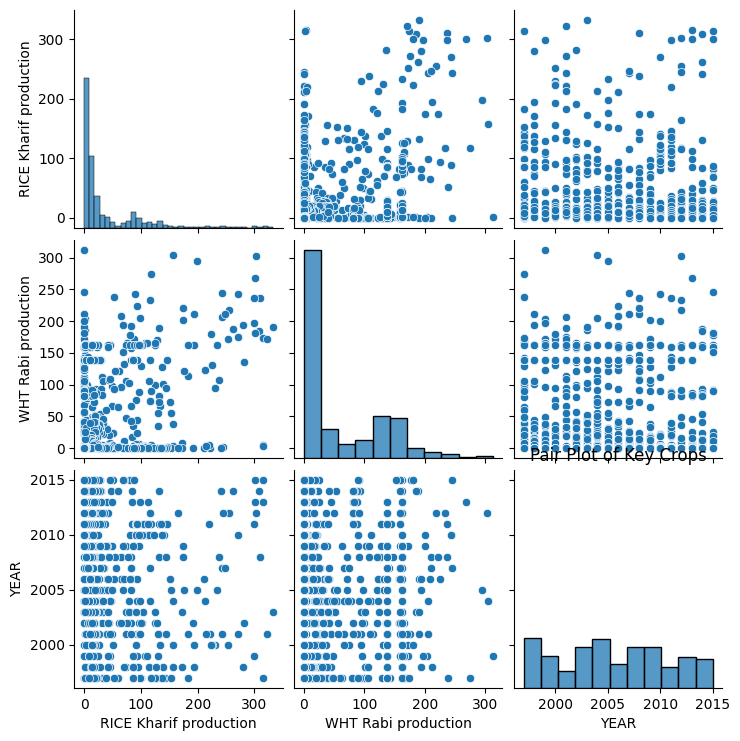

In [50]:
plt.figure(figsize=(12, 8))
sns.pairplot(data[['RICE Kharif production', 'WHT Rabi production', 'YEAR']])
plt.title('Pair Plot of Key Crops')
plt.show()

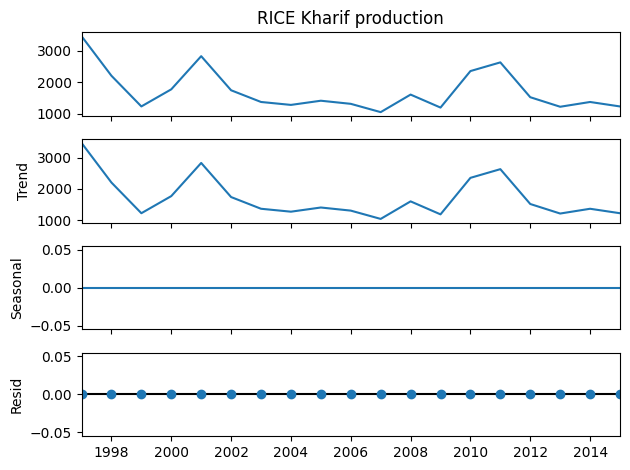

In [51]:
if 'YEAR' in data.columns:
    yearly_production = data.groupby('YEAR')['RICE Kharif production'].sum()
    decomposition = seasonal_decompose(yearly_production, model='additive', period=1)
    decomposition.plot()
    plt.show()

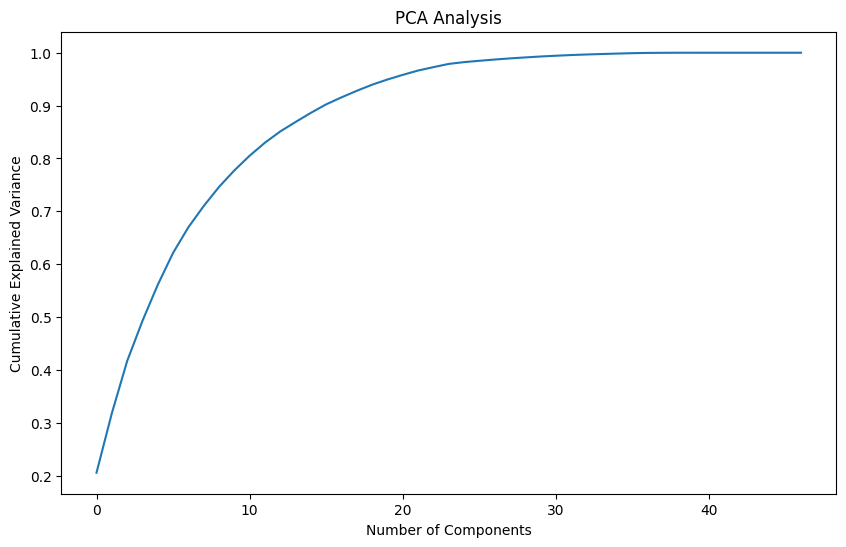

In [52]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Analysis')
plt.show()

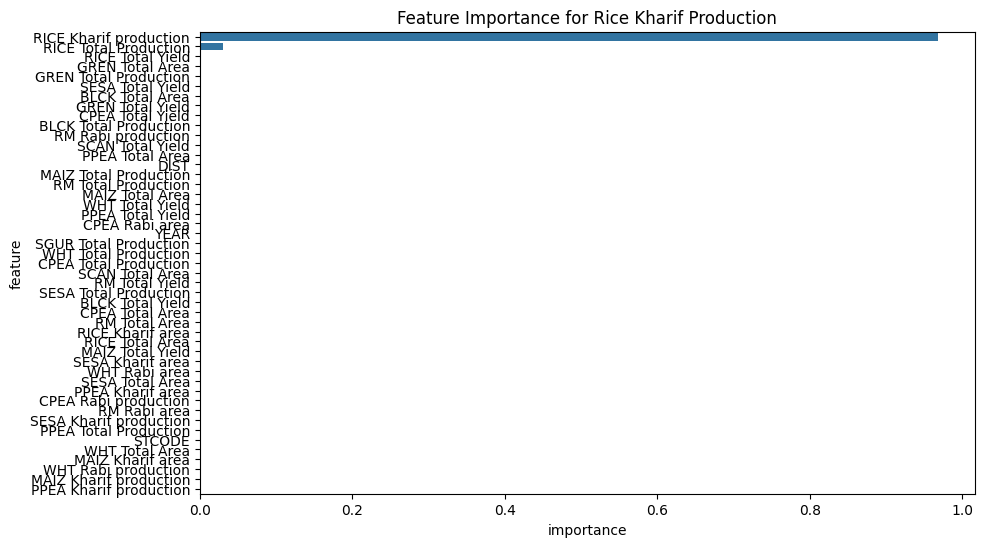

In [53]:
X = data[numerical_columns]
y = data['RICE Kharif production']  # Assuming this is the target variable
rf = RandomForestRegressor()
rf.fit(X, y)

feature_importance = pd.DataFrame({'feature': numerical_columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Rice Kharif Production')
plt.show()

In [54]:
print("\nKey Insights:")
print(f"1. The dataset contains {data.shape[0]} rows and {data.shape[1]} columns after cleaning.")
print(f"2. The top 3 states (i.e State codes) by rice production are: {', '.join(data.groupby('STCODE')['RICE Kharif production'].mean().nlargest(3).index.astype(str))}")
print(f"3. The year with the highest total production was: {data.groupby('YEAR')['RICE Kharif production'].sum().idxmax()}")
print("4. PCA analysis shows that the first few components explain most of the variance in the data.")
print(f"5. The most important feature for predicting rice production is: {feature_importance.iloc[0]['feature']}")


Key Insights:
1. The dataset contains 803 rows and 47 columns after cleaning.
2. The top 3 states (i.e State codes) by rice production are: 7, 14, 3
3. The year with the highest total production was: 1997
4. PCA analysis shows that the first few components explain most of the variance in the data.
5. The most important feature for predicting rice production is: RICE Kharif production


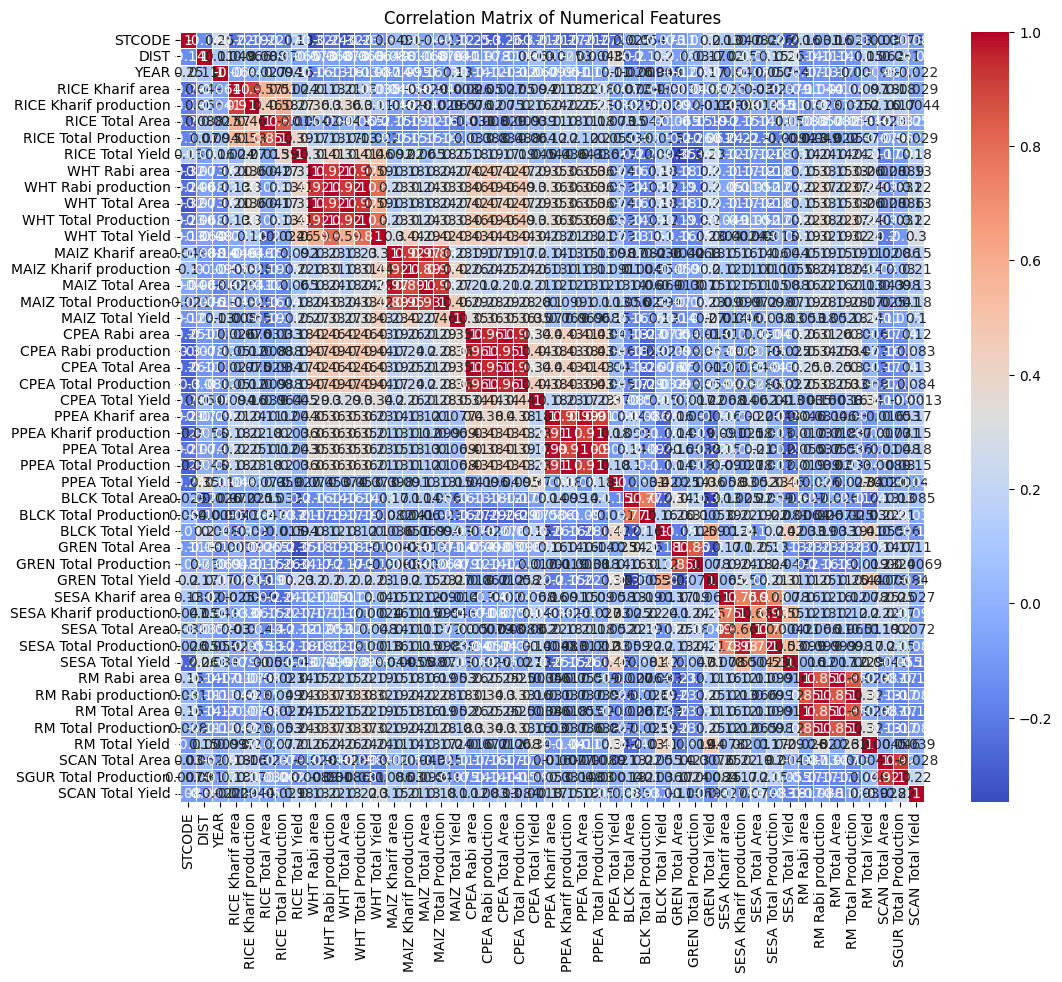

In [55]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

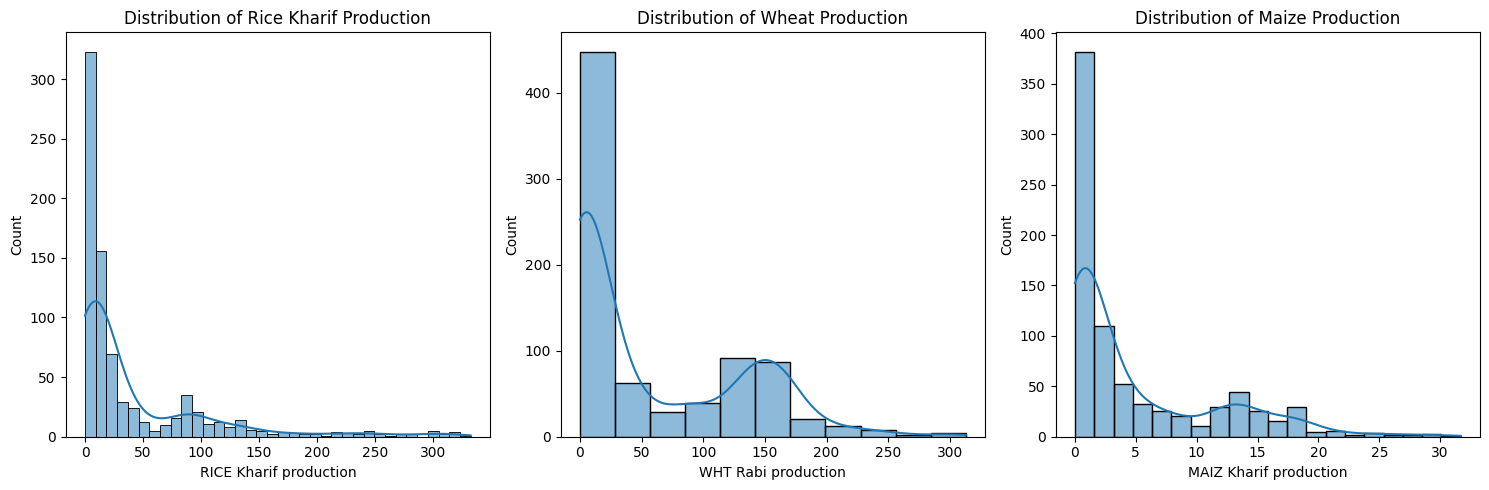

In [56]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(data['RICE Kharif production'], kde=True)
plt.title('Distribution of Rice Kharif Production')
plt.subplot(132)
sns.histplot(data['WHT Rabi production'], kde=True)
plt.title('Distribution of Wheat Production')
plt.subplot(133)
sns.histplot(data['MAIZ Kharif production'], kde=True)
plt.title('Distribution of Maize Production')
plt.tight_layout()
plt.show()

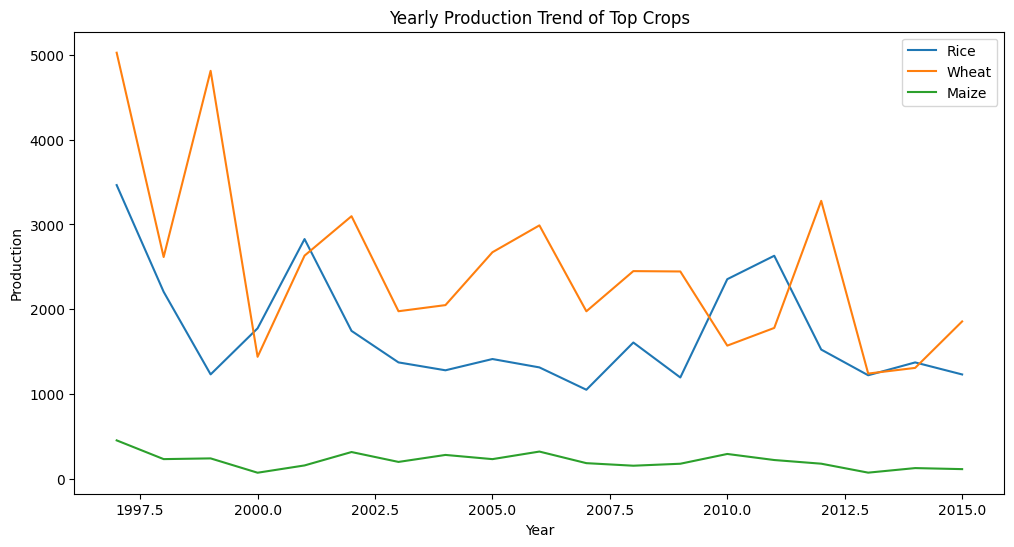

In [57]:
yearly_data = data.groupby('YEAR')[['RICE Kharif production', 'WHT Rabi production', 'MAIZ Kharif production']].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(yearly_data['YEAR'], yearly_data['RICE Kharif production'], label='Rice')
plt.plot(yearly_data['YEAR'], yearly_data['WHT Rabi production'], label='Wheat')
plt.plot(yearly_data['YEAR'], yearly_data['MAIZ Kharif production'], label='Maize')
plt.title('Yearly Production Trend of Top Crops')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()

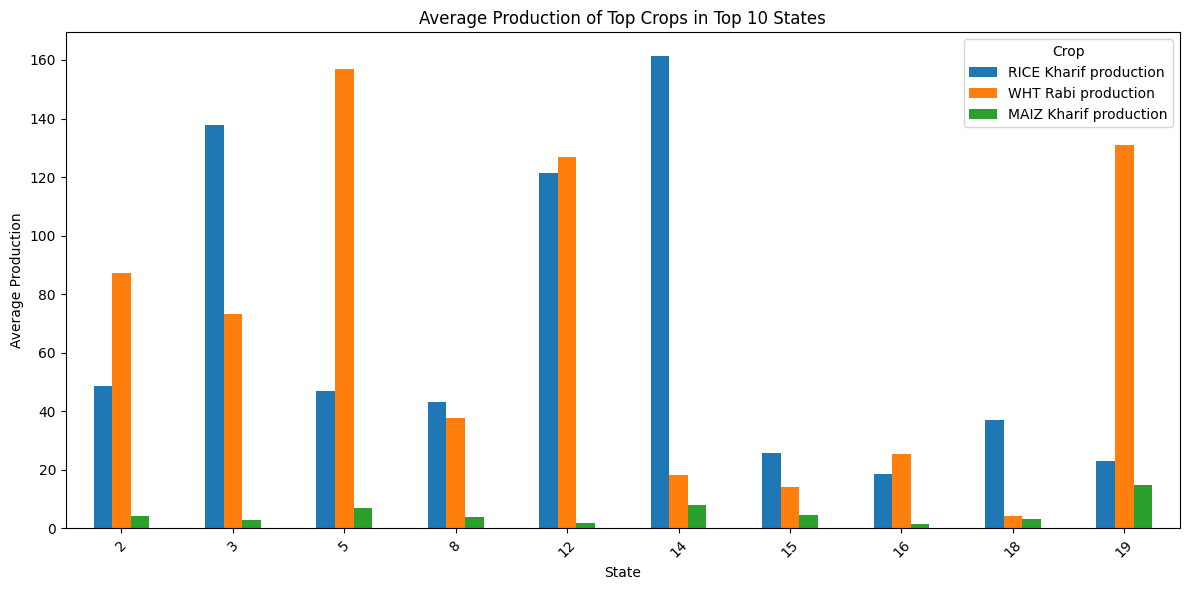

In [58]:
top_states = data.groupby('STCODE')['RICE Kharif production'].sum().nlargest(10).index
state_crop_data = data[data['STCODE'].isin(top_states)].groupby('STCODE')[['RICE Kharif production', 'WHT Rabi production', 'MAIZ Kharif production']].mean()
state_crop_data.plot(kind='bar', figsize=(12, 6))
plt.title('Average Production of Top Crops in Top 10 States')
plt.xlabel('State')
plt.ylabel('Average Production')
plt.legend(title='Crop')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()